In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [4]:
def load_data(train_batch_size, test_batch_size):
    trainset = datasets.MNIST('data', train=True, download=True,
                              transform=transforms.Compose([
                                  transforms.Resize((32, 32)),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,), (0.3081,))
                              ]))
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

    testset = datasets.MNIST('data', train=False, download=True,
                             transform=transforms.Compose([
                                 transforms.Resize((32, 32)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))
    test_loader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)

    return train_loader, test_loader


In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [6]:
train_batch_size = 100
test_batch_size = 100
train_loader, test_loader = load_data(train_batch_size, test_batch_size)

100%|██████████| 9912422/9912422 [00:00<00:00, 94917597.74it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 119345511.16it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 30671453.71it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22333562.45it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
def train(model, optimizer, train_loader):
    model.train()
    correct = 0
    train_loss = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pred = output.argmax(dim=1)
        correct += pred.eq(target.view_as(pred)).sum().item()

    avg_train_loss = train_loss / len(train_loader)  # Average loss per batch
    accuracy = 100.0 * correct / len(train_loader.dataset)  # Calculate accuracy as a percentage

    return avg_train_loss, accuracy


In [18]:
def test(model, epoch, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)

        output = model(data)
        loss = loss_fn(output, target)
        test_loss += loss.data

        pred = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(pred, target.data).sum()

    # Print log
    test_loss = (test_loss * 100) / len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss

In [19]:
model = CNN()

optimizer = optim.Adam(model.parameters(), lr=0.0001)
m1_train_loss_arr = []
m1_test_loss_arr = []

epochs = 100
log_interval = 500
loss_fn = torch.nn.CrossEntropyLoss()
for epoch in range(1, epochs + 1):
    tr_loss, acc = train(model, optimizer, train_loader)
    m1_train_loss_arr.append(tr_loss)
    loss_test = test(model, epoch, test_loader)
    m1_test_loss_arr.append(loss_test)
    print('Epoch: ', epoch)
    print('Loss= ', tr_loss)


Test set, Epoch 1 , Average loss: 0.2794, Accuracy: 9172/10000 (92%)

Epoch:  1
Loss=  0.846331517919898

Test set, Epoch 2 , Average loss: 0.1740, Accuracy: 9485/10000 (95%)

Epoch:  2
Loss=  0.23690913566698632

Test set, Epoch 3 , Average loss: 0.1216, Accuracy: 9628/10000 (96%)

Epoch:  3
Loss=  0.1598800948324303

Test set, Epoch 4 , Average loss: 0.0905, Accuracy: 9720/10000 (97%)

Epoch:  4
Loss=  0.12045158582273871

Test set, Epoch 5 , Average loss: 0.0799, Accuracy: 9748/10000 (97%)

Epoch:  5
Loss=  0.09934300691510241

Test set, Epoch 6 , Average loss: 0.0672, Accuracy: 9796/10000 (98%)

Epoch:  6
Loss=  0.08501970355709394

Test set, Epoch 7 , Average loss: 0.0583, Accuracy: 9820/10000 (98%)

Epoch:  7
Loss=  0.07542541986952225

Test set, Epoch 8 , Average loss: 0.0559, Accuracy: 9823/10000 (98%)

Epoch:  8
Loss=  0.06769224554145088

Test set, Epoch 9 , Average loss: 0.0496, Accuracy: 9848/10000 (98%)

Epoch:  9
Loss=  0.06177359186811373

Test set, Epoch 10 , Average l

In [26]:
temp_1 = m1_train_loss_arr.copy()
temp_2 = m1_test_loss_arr.copy()


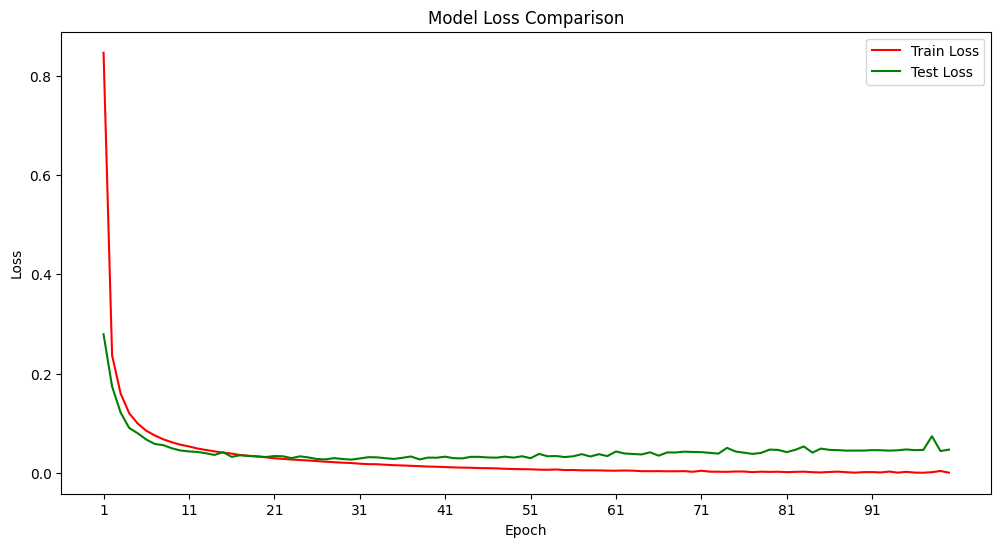

In [27]:
epochs = len(temp_1)
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, epochs + 1), temp_1, color="r")
plt.plot(np.arange(1, epochs + 1), temp_2, color="g")
plt.title('Model Loss Comparison')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1, epochs + 1, step=max(1, epochs // 10)))
plt.show()